In [17]:
import scipy as sp
import pandas as pd
import numpy as np

In [62]:
df = pd.read_csv('Data/Titanic/train.csv',  header=0, index_col=0)

In [19]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [72]:
from sklearn.preprocessing import LabelEncoder

def process_data(df_raw):
    result = df_raw
    encoder = LabelEncoder()
    
    result['Cabin']=result['Cabin'].fillna('NA') # Cabin might be important, consider custom encoding it
    result = result.dropna(how='any')
    result = result.drop('Ticket', axis=1)

    result['Embarked'] = encoder.fit_transform(result['Embarked'])
    result['Sex'] = encoder.fit_transform(result['Sex'])
    return result


In [73]:
processed = process_data(df)
processed.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NA,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NA,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NA,2


In [23]:
df[['Embarked','Sex']].head()

,Embarked,Sex
PassengerId,,
1,2,1
2,0,0
3,2,0
4,2,0
5,2,1


In [24]:
from matplotlib import pyplot
subplotCols = ['Sex','Age','SibSp','Parch','Fare','Embarked']
row = 1
pyplot.figure()
for col in subplotCols:
    pyplot.subplot(len(subplotCols), 1, row)
    y = df[col].values
    pyplot.hist(y)
    pyplot.title(col,y=0.5, loc='right')
    row += 1

pyplot.tight_layout()    
pyplot.show()

### Now we are ready to build some models for predicting the survival rate 

1. *Decision Tree*

In [25]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NA,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NA,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NA,2


In [126]:
features = ['Sex','Age','SibSp','Parch','Fare','Embarked']

def create_training_set(df, features, label = 'Survived'):
    X = df[features].values
    y = df[label].values
    return X, y
    

In [127]:
X, y = create_training_set(df, features)

In [128]:
X

array([['male', 22.0, 1L, 0L, 7.25, 'S'],
       ['female', 38.0, 1L, 0L, 71.2833, 'C'],
       ['female', 26.0, 0L, 0L, 7.925, 'S'],
       ..., 
       ['female', nan, 1L, 2L, 23.45, 'S'],
       ['male', 26.0, 0L, 0L, 30.0, 'C'],
       ['male', 32.0, 0L, 0L, 7.75, 'Q']], dtype=object)

In [31]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.19.1.


In [42]:
from sklearn import tree
from sklearn.tree import export_graphviz

tree_classifier_max_leaf = tree.DecisionTreeClassifier(max_leaf_nodes=12)
tree_classifier_max_leaf.fit(X,y)

dot_data_max_leaf = tree.export_graphviz(tree_classifier_max_leaf,
                                 out_file=None,
                                 feature_names = features,
                                 class_names = ['Dead', 'Survived'],
                                 filled=True,
                                 rounded=True,
                                 special_characters=True)



In [33]:
# 1st way of plotting decsion tree - error with ExecutableNot found. Problematic with graphviz executables not found.

# Max leaf node plot

In [ ]:
# 2nd way of plotting decision tree

In [36]:
import pydotplus
from IPython.display import Image

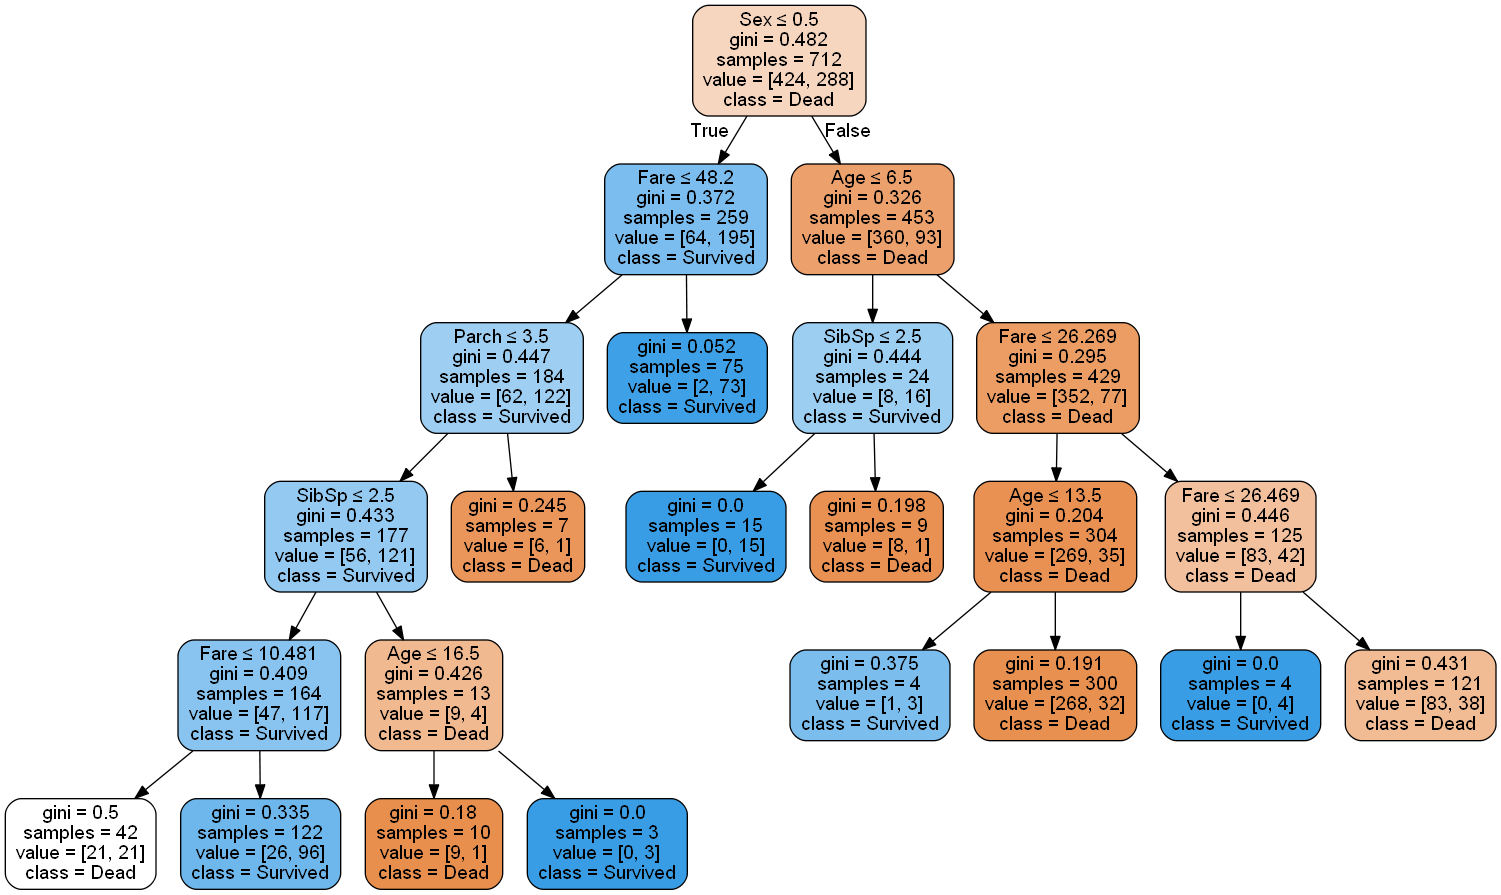

In [43]:
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Anaconda\\Library\\bin\\graphviz'
graph = pydotplus.graphviz.graph_from_dot_data(dot_data_max_leaf)
Image(graph.create_png())

## Max depth plot

In [47]:
tree_classifier_max_depth = tree.DecisionTreeClassifier(max_depth=4)
tree_classifier_max_depth.fit(X,y)

dot_data_max_depth = tree.export_graphviz(tree_classifier_max_depth,
                                 out_file=None,
                                 feature_names = features,
                                 class_names = ['Dead', 'Survived'],
                                 filled=True,
                                 rounded=True,
                                 special_characters=True)

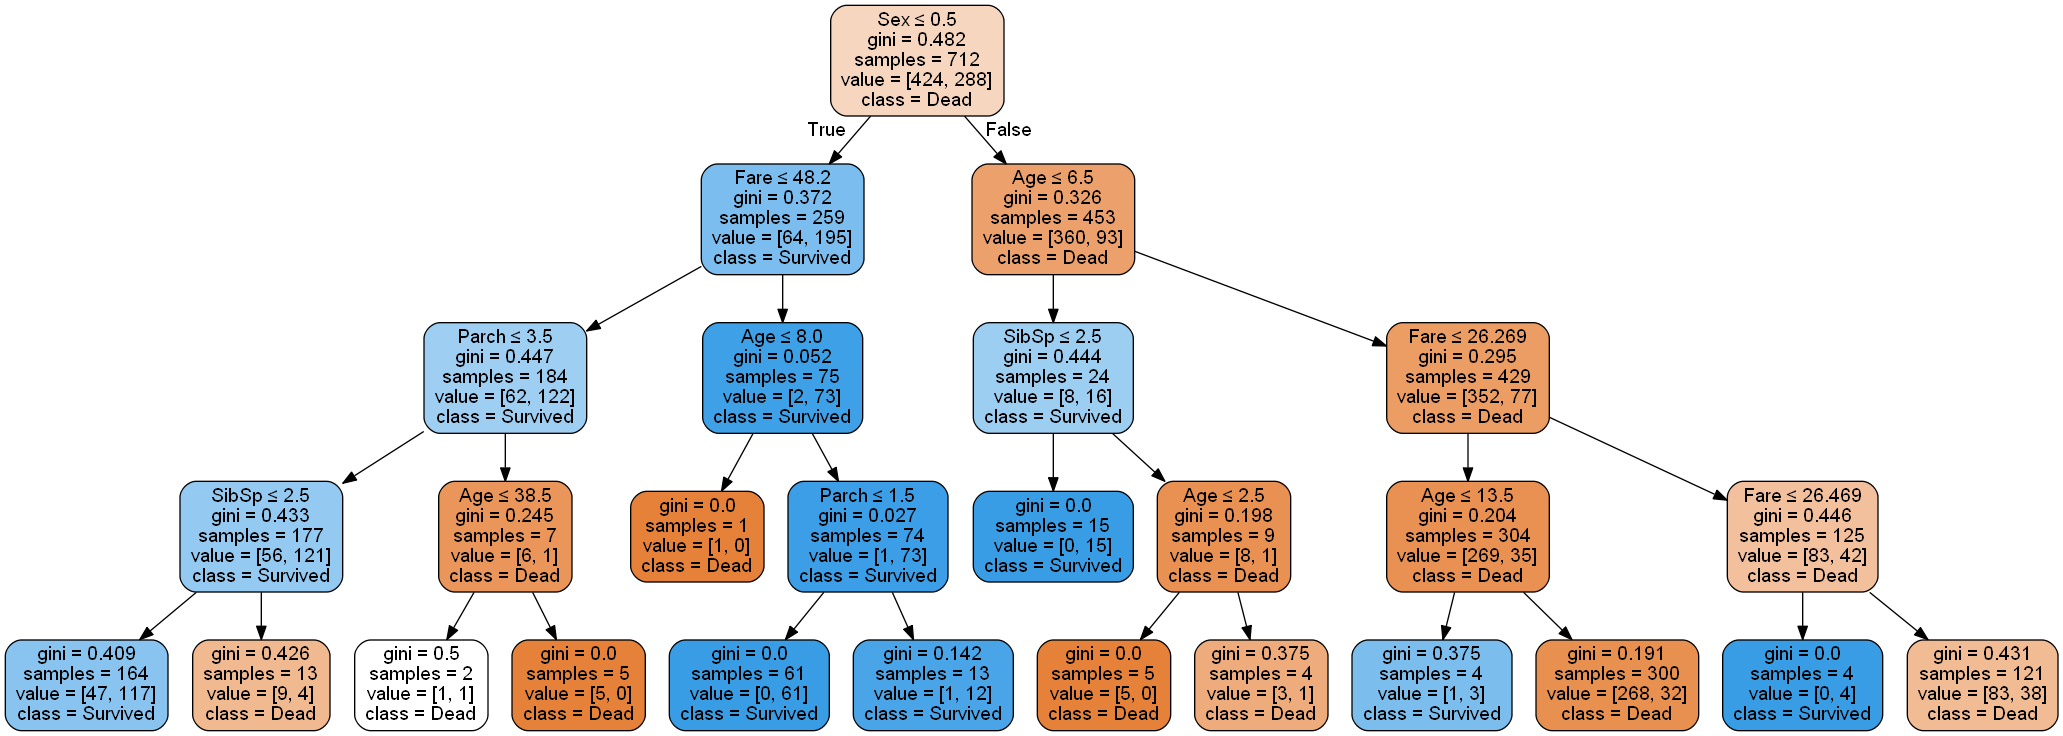

In [48]:
graph = pydotplus.graphviz.graph_from_dot_data(dot_data_max_depth)
Image(graph.create_png())

In [ ]:
# In both max depth and max leaf methods, "sex" is the root node of the decision tree. Meaning it gives the most
# information gain among other features.
# What alogrithm does sklearn decision tree classifier uses?
# Answer: http://scikit-learn.org/stable/modules/tree.html#tree-algorithms
# It is an optimized vesion of CART

## Combination of Min sample split and max leaf nodes

In [53]:
tree_classifier_combine = tree.DecisionTreeClassifier(min_samples_split=100, max_leaf_nodes=8)
tree_classifier_combine.fit(X,y)

dot_data_combine = tree.export_graphviz(tree_classifier_combine,
                                 out_file=None,
                                 feature_names = features,
                                 class_names = ['Dead', 'Survived'],
                                 filled=True,
                                 rounded=True,
                                 special_characters=True)

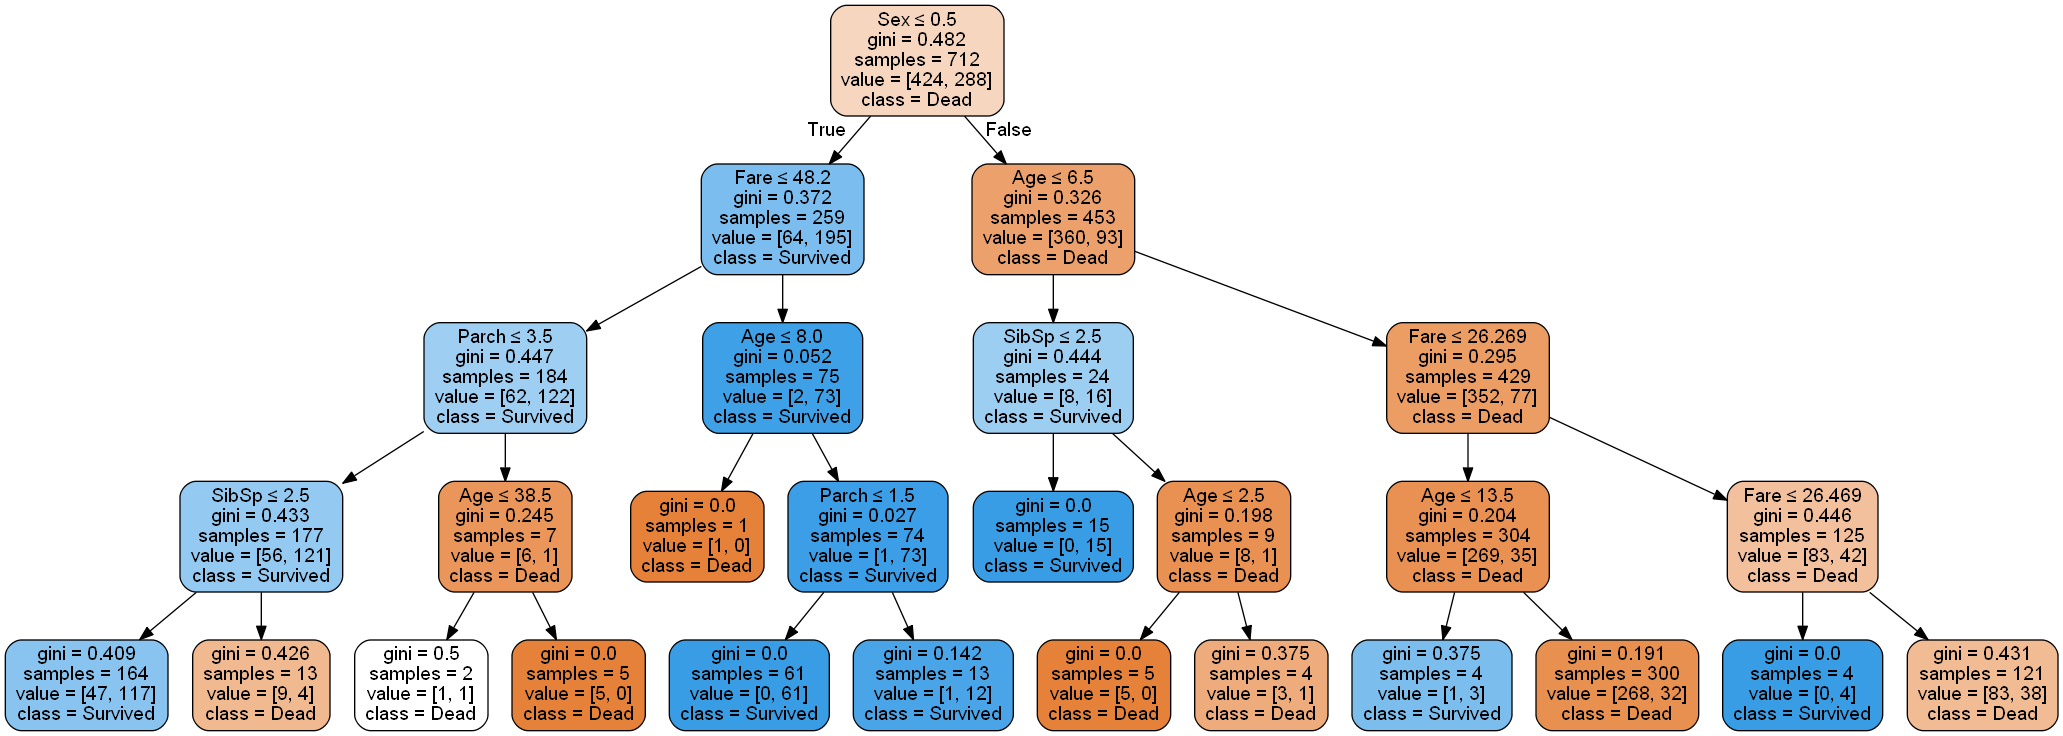

In [54]:
graph = pydotplus.graphviz.graph_from_dot_data(dot_data_max_depth)
Image(graph.create_png())

In [55]:
# How to decide which feature is more important?
# Gini importance!!

In [60]:
features

['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [59]:

tree_classifier_combine.feature_importances_

array([ 0.69810293,  0.07621255,  0.02801238,  0.02781882,  0.16985332,  0.        ])

In [58]:
tree_classifier_max_depth.feature_importances_

array([ 0.63651912,  0.1092928 ,  0.08279284,  0.02618157,  0.14521366,  0.        ])

In [ ]:
# Side note this is another way of exporting data for visualization

In [ ]:
# 3rd way of visualizing decision tree - using the string file and using graphviz web (google it!)

In [35]:
with open("titanic_classifer.dot", "w") as f:
    f = tree.export_graphviz(tree_classifier,
                                 out_file=f,
                                 feature_names = features,
                                 class_names = ['Dead', 'Survived'],
                                 filled=True,
                                 rounded=True,
                                 special_characters=True)

# How good is our model?

In [61]:
df_test = pd.read_csv('Data/Titanic/test.csv',  header=0, index_col=0)
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [74]:
processed = process_data(df_test)
processed.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,NA,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,NA,2
894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,NA,1
895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,NA,2
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,NA,2


In [95]:
processed.index.values.tolist()

[892L,
 893L,
 894L,
 895L,
 896L,
 897L,
 898L,
 899L,
 900L,
 901L,
 903L,
 904L,
 905L,
 906L,
 907L,
 908L,
 909L,
 910L,
 911L,
 912L,
 913L,
 915L,
 916L,
 917L,
 918L,
 919L,
 920L,
 922L,
 923L,
 924L,
 926L,
 927L,
 929L,
 930L,
 932L,
 934L,
 935L,
 936L,
 937L,
 938L,
 940L,
 941L,
 942L,
 943L,
 944L,
 945L,
 947L,
 948L,
 949L,
 951L,
 952L,
 953L,
 954L,
 955L,
 956L,
 958L,
 959L,
 960L,
 961L,
 962L,
 963L,
 964L,
 965L,
 966L,
 967L,
 969L,
 970L,
 971L,
 972L,
 973L,
 974L,
 978L,
 979L,
 981L,
 982L,
 984L,
 986L,
 987L,
 988L,
 989L,
 990L,
 991L,
 992L,
 993L,
 995L,
 996L,
 997L,
 998L,
 1001L,
 1002L,
 1004L,
 1005L,
 1006L,
 1007L,
 1009L,
 1010L,
 1011L,
 1012L,
 1014L,
 1015L,
 1017L,
 1018L,
 1020L,
 1021L,
 1022L,
 1023L,
 1026L,
 1027L,
 1028L,
 1029L,
 1030L,
 1031L,
 1032L,
 1033L,
 1034L,
 1035L,
 1036L,
 1037L,
 1039L,
 1041L,
 1042L,
 1045L,
 1046L,
 1047L,
 1048L,
 1049L,
 1050L,
 1051L,
 1053L,
 1054L,
 1056L,
 1057L,
 1058L,
 1059L,
 1061L,
 1063L,


In [130]:
processed_df = process_data(pd.read_csv('Data/Titanic/test.csv',  header=0, index_col=0))
def generate_prediction(processed_df, features, classifier = tree_classifier_combine):
    prediction = {}
    X_features = processed_df[features]
    X = X_features.values
    p_id = processed_df.index.values
    result = classifier.predict(X)
    return result, dict(zip(p_id.tolist(), result.tolist()))
    
y_predict, result = generate_prediction(processed_df, features, tree_classifier_combine)

In [ ]:
# Write to a file for submission to Kaggle

In [131]:
import csv

with open('Data/Titanic/submission.txt', 'wb') as f:
    writer = csv.writer(f, delimiter=',', quotechar='\"')
    writer.writerow(["PassengerId","Survived"])
    for key, value in sorted(result.items()):
        try:
            writer.writerow([key, value])
        except:
            print e

## Precision and Accuracy - Putting it all together

In [109]:
# Find precision and accuracy score
# However there is no label ('Survived') column in the test.csv
# Which means that we need to use training data (train.csv) to do validation.
# Use 30% of train data to validate our accuracy and precision score before submission.

In [134]:
import math
def split_training_set(df, ratio=0.7):
    cutoff = int(math.floor(ratio*len(df.index)))
    train_X = df[:cutoff]
    validation_X = df[cutoff:]
    return train_X, validation_X

In [ ]:
# Let's start
# 1. pre-process
# 2. split the data
# 3. train the model
# 4. calculate precision/accuracy

In [168]:
import scipy as sp
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

def get_good_model(process_data_func=process_data):
    # 1. pre-process
    df = pd.read_csv('Data/Titanic/train.csv',  header=0, index_col=0)
    processed_df = process_data_func(df)

    # 2. split 
    train_X, validation_X = split_training_set(processed_df)

    # 3. train
    features = ['Sex','Age','SibSp','Parch','Fare','Embarked']

    X, y = create_training_set(train_X, features, label = 'Survived')

    tree_classifier_optimized = tree.DecisionTreeClassifier(min_samples_split=80, max_leaf_nodes=6)
    tree_classifier_optimized.fit(X,y)

    # 4. Precision/Accuracy
    y_true = validation_X['Survived']
    y_predict = tree_classifier_optimized.predict(validation_X[features].values)

    p_score = precision_score(y_true, y_predict)
    a_score = accuracy_score(y_true, y_predict)
    
    return p_score, a_score


In [136]:
p_score, a_score = get_good_model()
p_score

0.73972602739726023

In [137]:
a_score

0.78037383177570097

In [ ]:
# We hope to push it to 0.9 level, what should we do?

### 1. Replace NA row with default value - most probable value

In [139]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NA,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NA,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NA,Q


In [143]:
#import statistics
df['Parch'].median()

0.0

In [166]:
def process_data_replace_with_median(df_raw):
    result = df_raw
    encoder = LabelEncoder()
    
    result=result.drop('Cabin', axis=1) # Cabin might be important, consider custom encoding it
    #result = result.dropna(how='any')
    result = result.drop('Ticket', axis=1)

    result['Embarked'] = encoder.fit_transform(result['Embarked'])
    result['Sex'] = encoder.fit_transform(result['Sex'])
    
    features = ['Sex','Age','SibSp','Parch','Fare','Embarked']
    refined = result[features]
    for index, row in result.iterrows():
        for col in features:
            if str(row[col]).lower() == 'NaN'.lower():
                result.at[index, col] = result[col].median()
                #print col + ' ' + str(result[col].median())
                
    return result

test_df = process_data_refined(df)
test_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.00,4
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.00,4
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,23.45,4
890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.00,2
891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,7.75,3


In [169]:
p_score, a_score = get_good_model(process_data_replace_with_median)

In [170]:
p_score

0.72826086956521741

In [171]:
a_score

0.79850746268656714

In [172]:
# Actually the precision score is lower but the accuracy score is higher. Not very conclusive. Can we do better?
# Instead of replacing the missing values with median value, how about the most common value from that column?

In [178]:
def process_data_replace_with_mode(df_raw):
    result = df_raw
    encoder = LabelEncoder()
    
    result=result.drop('Cabin', axis=1) # Cabin might be important, consider custom encoding it
    #result = result.dropna(how='any')
    result = result.drop('Ticket', axis=1)

    result['Embarked'] = encoder.fit_transform(result['Embarked'])
    result['Sex'] = encoder.fit_transform(result['Sex'])
    
    features = ['Sex','Age','SibSp','Parch','Fare','Embarked']
    refined = result[features]
    for index, row in result.iterrows():
        for col in features:
            if str(row[col]).lower() == 'NaN'.lower():
                result.at[index, col] = result[col].mode()
                #print col + ' ' + str(result[col].median())
                
    return result

In [179]:
p_score, a_score = get_good_model(process_data_replace_with_mode)

In [180]:
p_score

0.72826086956521741

In [181]:
a_score

0.79850746268656714